In [ ]:
#I certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I did not receive any external help, coaching or contributions during the production of this work.

Part-3 Building a CNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import mnist
import random


In [2]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] 

visualization Graph(1)

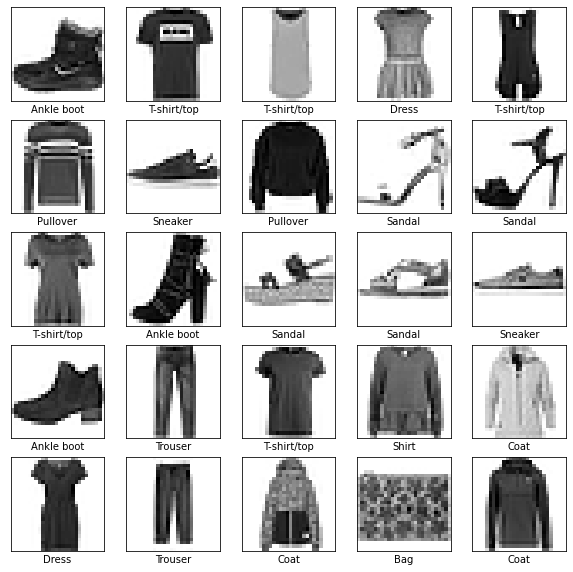

In [4]:
plt.figure(figsize=[10,10])
for i in range (25):    
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[Y_train[i]])

plt.show()

In [5]:
xtr = pd.DataFrame(X_train.reshape(60000, (28*28)))
xts = pd.DataFrame(X_test.reshape(10000, (28*28)))

In [6]:
xtr.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


In [7]:
x_train = X_train.reshape(60000,28,28,1)
x_test = X_test.reshape(10000,28,28, 1)

In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
x_test.shape

(10000, 28, 28, 1)

In [10]:
Y_train.shape

(60000,)

In [11]:
y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
np.random.seed(123)

In [12]:
y_train.shape

(60000, 10)

CNN Model

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.04))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.7504 - accuracy: 0.7591 - val_loss: 0.3785 - val_accuracy: 0.8679
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3543 - accuracy: 0.8718 - val_loss: 0.3144 - val_accuracy: 0.8900
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2934 - accuracy: 0.8930 - val_loss: 0.2773 - val_accuracy: 0.9028
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2601 - accuracy: 0.9052 - val_loss: 0.2691 - val_accuracy: 0.9067
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2361 - accuracy: 0.9133 - val_loss: 0.2596 - val_accuracy: 0.9071
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2152 - accuracy: 0.9213 - val_loss: 0.2479 - val_accuracy: 0.9116
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2022 - accuracy: 0.9258 - val_loss: 0.2584 - val_accuracy: 0.9105

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.1298 - accuracy: 0.9503
The accuracy of the Training data set is  95.02833485603333
313/313 [==============================] - 1s 4ms/step - loss: 0.2653 - accuracy: 0.9161
The accuracy of the Test data set is  91.6100025177002


In [ ]:
pred = model.predict(x_test)
print(pred)
 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

[[1.30170414e-11 5.65835529e-12 1.37026076e-11 ... 3.73431976e-05
  2.87985866e-08 9.99550283e-01]
 [1.90337332e-07 4.53356597e-14 9.99373972e-01 ... 1.60385573e-17
  6.76732596e-13 3.88704690e-16]
 [4.94829104e-20 1.00000000e+00 6.74138861e-19 ... 2.63528449e-36
  6.33338009e-20 2.52812009e-28]
 ...
 [6.07094073e-13 1.81495088e-14 2.36109201e-13 ... 1.45549652e-15
  1.00000000e+00 7.32341311e-17]
 [2.13520462e-18 1.00000000e+00 2.31238433e-16 ... 1.02429483e-33
  1.14092699e-20 2.52532741e-26]
 [5.25851829e-05 4.65169205e-06 1.31194302e-05 ... 1.89912077e-02
  6.85137324e-03 2.13433383e-03]]
[9 2 1 ... 8 1 5]


visualizing the Predicted Images  (Visualization Graph 2)

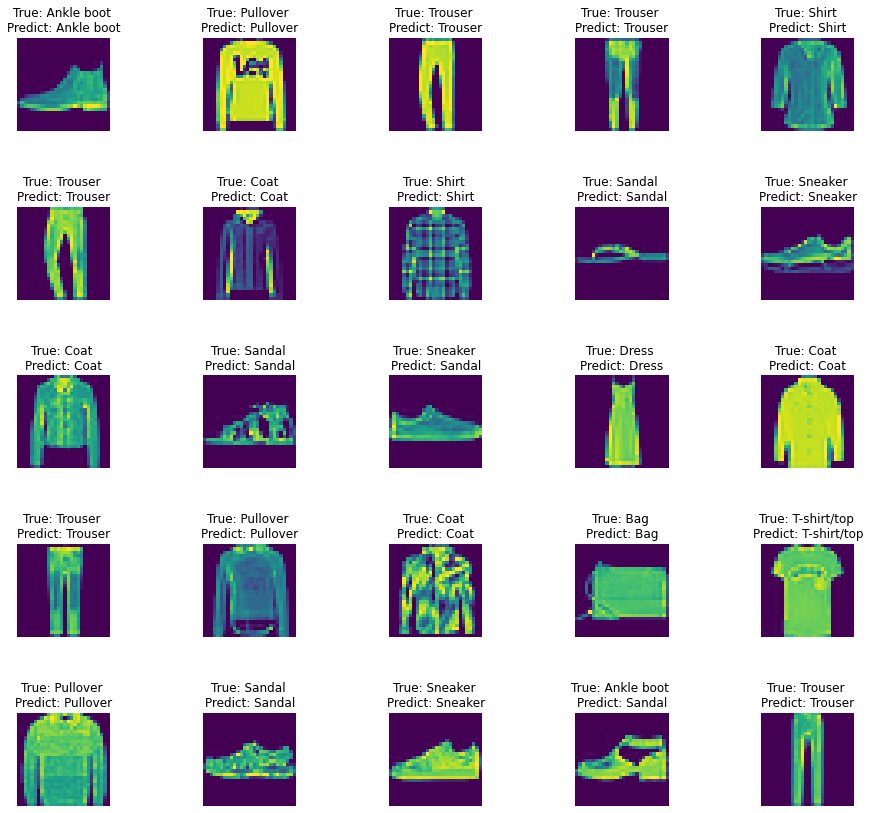

In [ ]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()
x_test_img = x_test.reshape(10000,28,28)

for i in np.arange(0, 25):
    axes[i].imshow(x_test_img[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(y_test[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

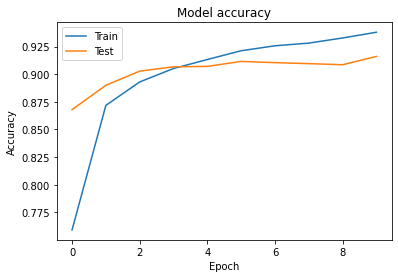

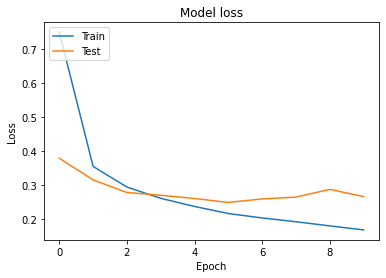

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Checking the CNN Model with the improvement methods

Gradient CLipping

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


model.compile(optimizer=tf.keras.optimizers.Adam(clipvalue=0.5), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 17ms/step - loss: 0.7513 - accuracy: 0.7682 - val_loss: 0.4064 - val_accuracy: 0.8557
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3612 - accuracy: 0.8688 - val_loss: 0.3396 - val_accuracy: 0.8765
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.3018 - accuracy: 0.8908 - val_loss: 0.2876 - val_accuracy: 0.8965
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2656 - accuracy: 0.9042 - val_loss: 0.2700 - val_accuracy: 0.9015
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2446 - accuracy: 0.9097 - val_loss: 0.2769 - val_accuracy: 0.9032
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2261 - accuracy: 0.9168 - val_loss: 0.2562 - val_accuracy: 0.9118
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.2113 - accuracy: 0.9222 - val_loss: 0.2463 - val_accuracy: 0.9163

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1442 - accuracy: 0.9427
The accuracy of the Training data set is  94.27499771118164
313/313 [==============================] - 1s 4ms/step - loss: 0.2559 - accuracy: 0.9108
The accuracy of the Test data set is  91.07999801635742


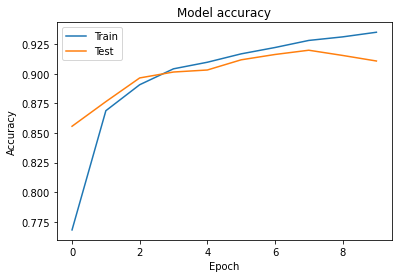

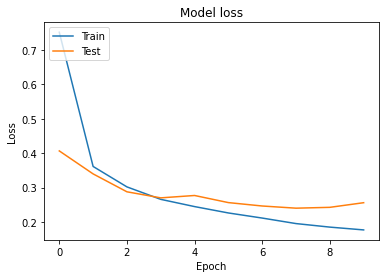

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Batch Normalization

In [ ]:
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4530 - accuracy: 0.8365 - val_loss: 0.3983 - val_accuracy: 0.8503
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2909 - accuracy: 0.8935 - val_loss: 0.2928 - val_accuracy: 0.8927
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2425 - accuracy: 0.9110 - val_loss: 0.2587 - val_accuracy: 0.9075
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.2140 - accuracy: 0.9214 - val_loss: 0.2463 - val_accuracy: 0.9126
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1973 - accuracy: 0.9272 - val_loss: 0.2794 - val_accuracy: 0.8957
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1759 - accuracy: 0.9352 - val_loss: 0.2420 - val_accuracy: 0.9139
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1597 - accuracy: 0.9391 - val_loss: 0.2373 - val_accuracy: 0.9186

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.1036 - accuracy: 0.9608
The accuracy of the Training data set is  96.07666730880737
313/313 [==============================] - 1s 4ms/step - loss: 0.2413 - accuracy: 0.9201
The accuracy of the Test data set is  92.00999736785889


In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_31 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 batch_normalization_15 (Bat  (None, 24, 24, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 10, 10, 128)      

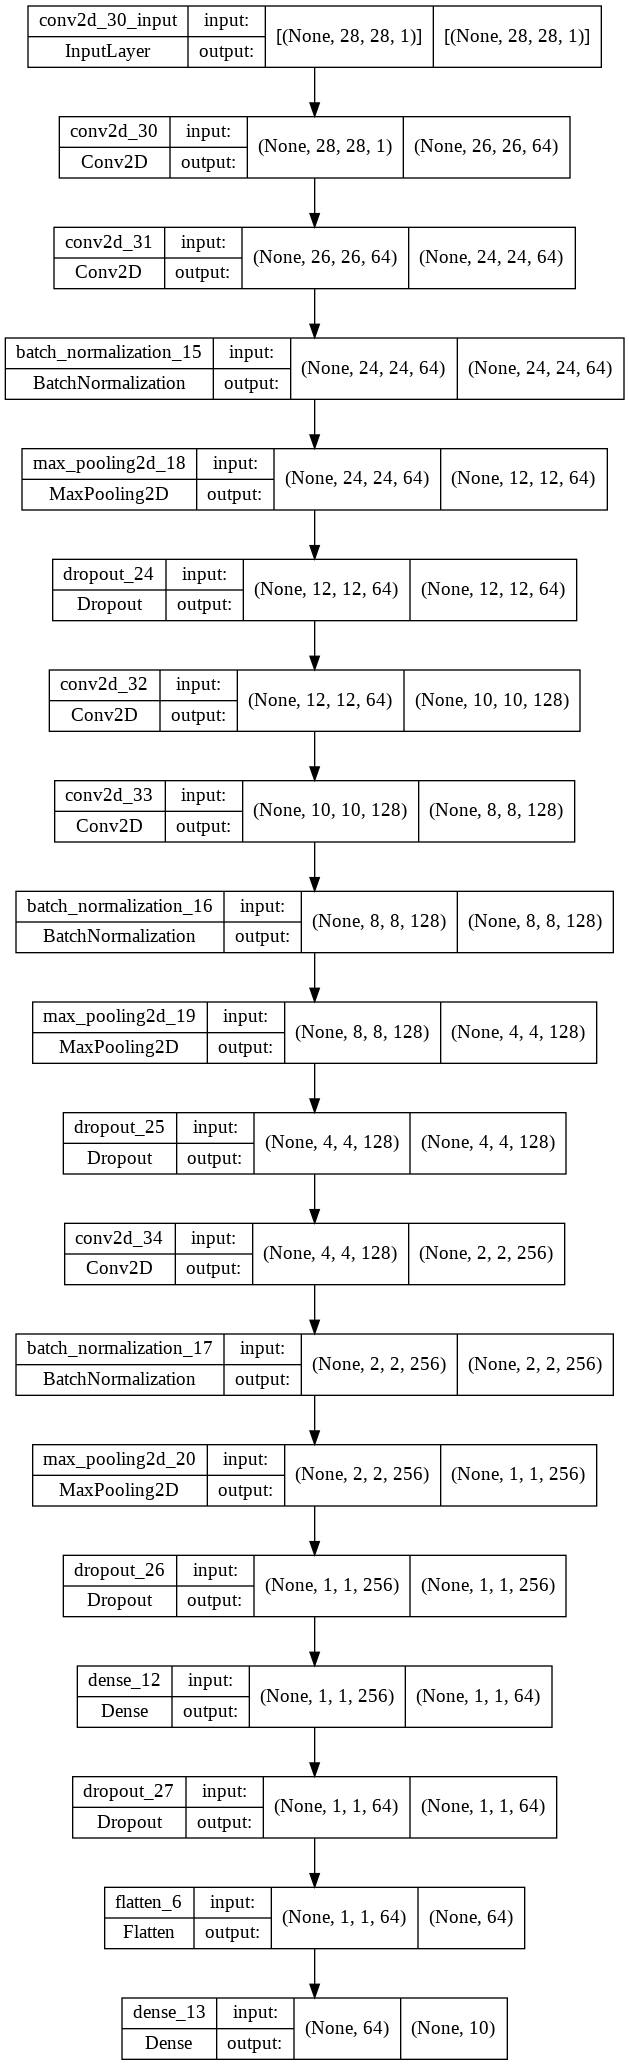

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

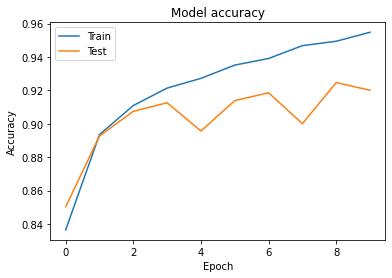

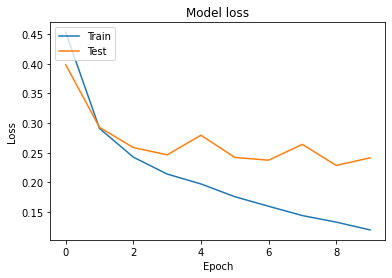

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

#Base CNN model is the one above as we got the Accuracy of 92.01

Kernel Regularization

In [ ]:
model = Sequential()
model.add(Conv2D(64,kernel_initializer="he_uniform", kernel_size=3, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.0001),input_shape=(28,28,1)))
model.add(Conv2D(64,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128,kernel_initializer="he_uniform", kernel_size=3, activation='relu',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10,kernel_initializer="he_uniform", activation='sigmoid',kernel_regularizer = tf.keras.regularizers.l2(0.0001)))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 15ms/step - loss: 3.3306 - accuracy: 0.6730 - val_loss: 0.6781 - val_accuracy: 0.7922
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 0.6493 - accuracy: 0.8041 - val_loss: 0.5336 - val_accuracy: 0.8498
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 0.5514 - accuracy: 0.8396 - val_loss: 0.4842 - val_accuracy: 0.8699
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4972 - accuracy: 0.8577 - val_loss: 0.4650 - val_accuracy: 0.8728
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4648 - accuracy: 0.8695 - val_loss: 0.4593 - val_accuracy: 0.8783
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4468 - accuracy: 0.8760 - val_loss: 0.4296 - val_accuracy: 0.8847
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 0.4230 - accuracy: 0.8824 - val_loss: 0.4158 - val_accuracy: 0.8901

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.3318 - accuracy: 0.9146
The accuracy of the Training data set is  91.45500063896179
313/313 [==============================] - 1s 4ms/step - loss: 0.4163 - accuracy: 0.8900
The accuracy of the Test data set is  88.99999856948853


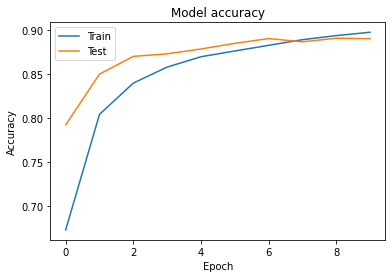

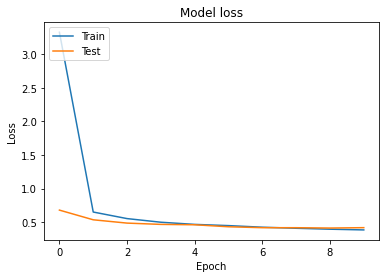

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Early Stopping

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=128,callbacks=[callback])

Epoch 1/5
469/469 [==============================] - 9s 17ms/step - loss: 0.4549 - accuracy: 0.8338 - val_loss: 0.3681 - val_accuracy: 0.8672
Epoch 2/5
469/469 [==============================] - 7s 16ms/step - loss: 0.2917 - accuracy: 0.8927 - val_loss: 0.2824 - val_accuracy: 0.8976
Epoch 3/5
469/469 [==============================] - 8s 17ms/step - loss: 0.2470 - accuracy: 0.9099 - val_loss: 0.2738 - val_accuracy: 0.9033
Epoch 4/5
469/469 [==============================] - 8s 16ms/step - loss: 0.2128 - accuracy: 0.9214 - val_loss: 0.2673 - val_accuracy: 0.9035
Epoch 5/5
469/469 [==============================] - 8s 16ms/step - loss: 0.1931 - accuracy: 0.9280 - val_loss: 0.2436 - val_accuracy: 0.9135


In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1599 - accuracy: 0.9402
The accuracy of the Training data set is  94.01666522026062
313/313 [==============================] - 1s 4ms/step - loss: 0.2436 - accuracy: 0.9135
The accuracy of the Test data set is  91.35000109672546


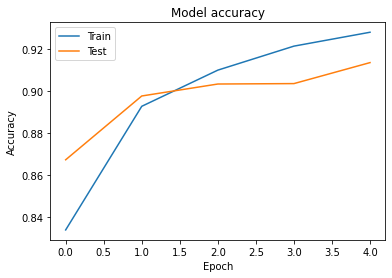

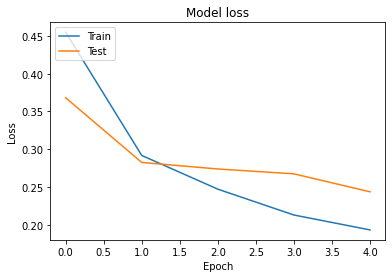

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Part 4 - Optimizing The CNN that gave the best accuracy after checking for improvement methods. CNN model with Batch normalization gave the best accuracy

Optimizer Nadam

In [ ]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Nadam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 11s 20ms/step - loss: 0.4478 - accuracy: 0.8382 - val_loss: 0.4130 - val_accuracy: 0.8477
Epoch 2/10
469/469 [==============================] - 9s 20ms/step - loss: 0.2905 - accuracy: 0.8944 - val_loss: 0.2899 - val_accuracy: 0.8908
Epoch 3/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2421 - accuracy: 0.9106 - val_loss: 0.2821 - val_accuracy: 0.8965
Epoch 4/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2106 - accuracy: 0.9232 - val_loss: 0.2928 - val_accuracy: 0.8960
Epoch 5/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1880 - accuracy: 0.9299 - val_loss: 0.2677 - val_accuracy: 0.9051
Epoch 6/10
469/469 [==============================] - 9s 19ms/step - loss: 0.1695 - accuracy: 0.9362 - val_loss: 0.2561 - val_accuracy: 0.9111
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1550 - accuracy: 0.9416 - val_loss: 0.2288 - val_accuracy: 0.919

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1008 - accuracy: 0.9619
The accuracy of the Training data set is  96.1899995803833
313/313 [==============================] - 1s 4ms/step - loss: 0.2578 - accuracy: 0.9152
The accuracy of the Test data set is  91.51999950408936


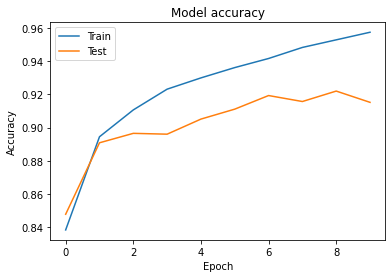

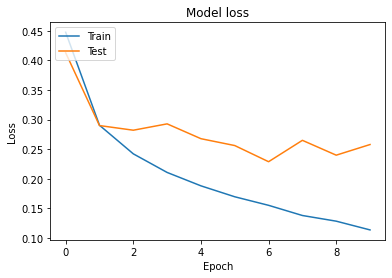

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4564 - accuracy: 0.8362 - val_loss: 0.3783 - val_accuracy: 0.8718
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2806 - accuracy: 0.8974 - val_loss: 0.4364 - val_accuracy: 0.8585
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2358 - accuracy: 0.9133 - val_loss: 0.3137 - val_accuracy: 0.8950
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2063 - accuracy: 0.9231 - val_loss: 0.2813 - val_accuracy: 0.9070
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1836 - accuracy: 0.9317 - val_loss: 0.2683 - val_accuracy: 0.9062
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1643 - accuracy: 0.9389 - val_loss: 0.2320 - val_accuracy: 0.9235
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1481 - accuracy: 0.9454 - val_loss: 0.2586 - val_accuracy: 0.9127

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0786 - accuracy: 0.9708
The accuracy of the Training data set is  97.079998254776
313/313 [==============================] - 1s 4ms/step - loss: 0.2833 - accuracy: 0.9211
The accuracy of the Test data set is  92.11000204086304


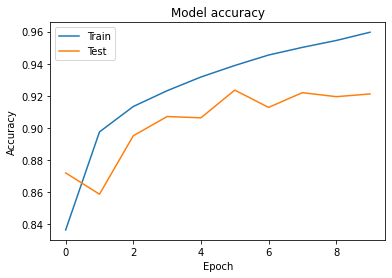

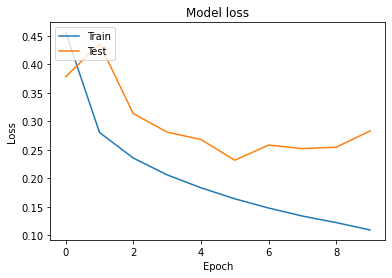

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer Adagrad


In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 0.7518 - accuracy: 0.7419 - val_loss: 0.5193 - val_accuracy: 0.8145
Epoch 2/10
469/469 [==============================] - 7s 16ms/step - loss: 0.5079 - accuracy: 0.8170 - val_loss: 0.4245 - val_accuracy: 0.8532
Epoch 3/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4489 - accuracy: 0.8396 - val_loss: 0.3901 - val_accuracy: 0.8644
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.4153 - accuracy: 0.8500 - val_loss: 0.3775 - val_accuracy: 0.8692
Epoch 5/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3907 - accuracy: 0.8601 - val_loss: 0.3608 - val_accuracy: 0.8722
Epoch 6/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3707 - accuracy: 0.8666 - val_loss: 0.3505 - val_accuracy: 0.8771
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3544 - accuracy: 0.8730 - val_loss: 0.3373 - val_accuracy: 0.8796

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2554 - accuracy: 0.9077
The accuracy of the Training data set is  90.77333211898804
313/313 [==============================] - 1s 4ms/step - loss: 0.3191 - accuracy: 0.8852
The accuracy of the Test data set is  88.5200023651123


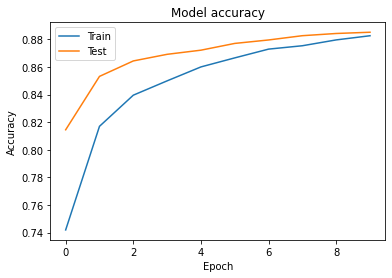

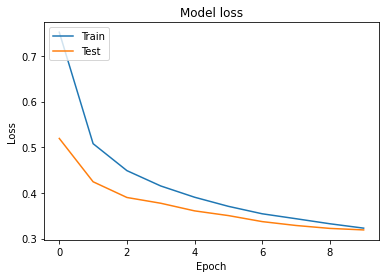

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Optimizer RMSprop gives the best accuracy for this model.

Activation Function - Softmax

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.4569 - accuracy: 0.8360 - val_loss: 0.3952 - val_accuracy: 0.8603
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2841 - accuracy: 0.8967 - val_loss: 0.3352 - val_accuracy: 0.8872
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2373 - accuracy: 0.9141 - val_loss: 0.2663 - val_accuracy: 0.9054
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2076 - accuracy: 0.9241 - val_loss: 0.2851 - val_accuracy: 0.8986
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1803 - accuracy: 0.9339 - val_loss: 0.2889 - val_accuracy: 0.9087
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1616 - accuracy: 0.9399 - val_loss: 0.2592 - val_accuracy: 0.9166
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1439 - accuracy: 0.9470 - val_loss: 0.2712 - val_accuracy: 0.917

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0793 - accuracy: 0.9701
The accuracy of the Training data set is  97.00999855995178
313/313 [==============================] - 1s 4ms/step - loss: 0.2610 - accuracy: 0.9245
The accuracy of the Test data set is  92.44999885559082


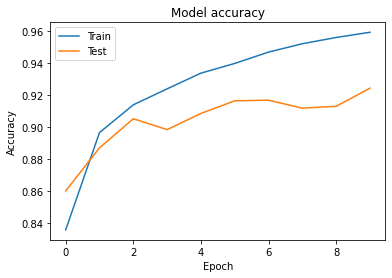

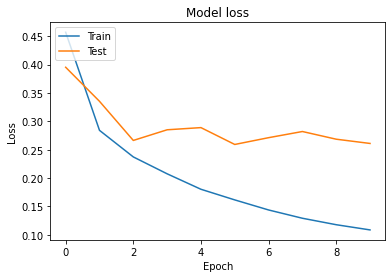

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation Function - Softplus

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softplus'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4426 - accuracy: 0.8409 - val_loss: 0.4233 - val_accuracy: 0.8390
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2749 - accuracy: 0.8998 - val_loss: 0.2902 - val_accuracy: 0.8930
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2295 - accuracy: 0.9169 - val_loss: 0.2829 - val_accuracy: 0.8933
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2029 - accuracy: 0.9254 - val_loss: 0.2514 - val_accuracy: 0.9163
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1802 - accuracy: 0.9338 - val_loss: 0.2932 - val_accuracy: 0.9050
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1594 - accuracy: 0.9403 - val_loss: 0.2755 - val_accuracy: 0.9121
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1452 - accuracy: 0.9461 - val_loss: 0.3246 - val_accuracy: 0.9102

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9693
The accuracy of the Training data set is  96.92833423614502
313/313 [==============================] - 1s 4ms/step - loss: 0.2634 - accuracy: 0.9213
The accuracy of the Test data set is  92.12999939918518


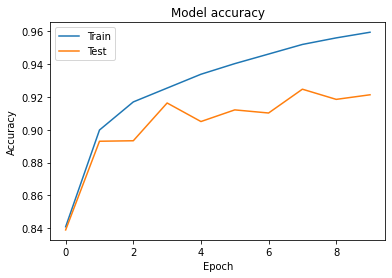

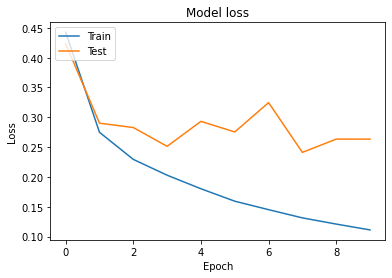

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation Function - sigmoid

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4704 - accuracy: 0.8333 - val_loss: 0.3848 - val_accuracy: 0.8669
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2892 - accuracy: 0.8953 - val_loss: 0.3156 - val_accuracy: 0.8820
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2446 - accuracy: 0.9105 - val_loss: 0.2812 - val_accuracy: 0.9036
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2136 - accuracy: 0.9207 - val_loss: 0.3065 - val_accuracy: 0.9021
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1920 - accuracy: 0.9300 - val_loss: 0.2714 - val_accuracy: 0.9041
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1695 - accuracy: 0.9378 - val_loss: 0.2464 - val_accuracy: 0.9187
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1517 - accuracy: 0.9444 - val_loss: 0.2678 - val_accuracy: 0.9158

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0945 - accuracy: 0.9650
The accuracy of the Training data set is  96.4983344078064
313/313 [==============================] - 1s 4ms/step - loss: 0.2844 - accuracy: 0.9188
The accuracy of the Test data set is  91.87999963760376


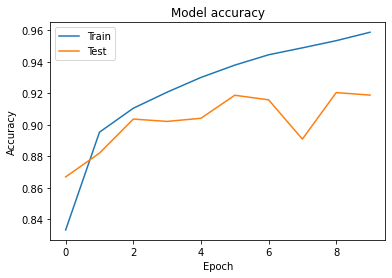

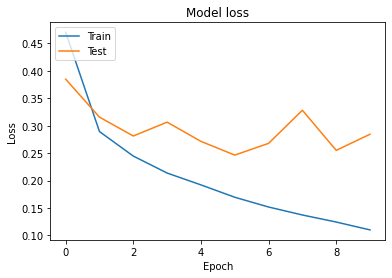

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Activation Function softmax gives the best accuracy for this model

Dropuout of 4%

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.04))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.04))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4568 - accuracy: 0.8349 - val_loss: 0.5617 - val_accuracy: 0.8006
Epoch 2/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2785 - accuracy: 0.8993 - val_loss: 0.3150 - val_accuracy: 0.8872
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2279 - accuracy: 0.9167 - val_loss: 0.3154 - val_accuracy: 0.8916
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1923 - accuracy: 0.9305 - val_loss: 0.3142 - val_accuracy: 0.8916
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1682 - accuracy: 0.9378 - val_loss: 0.2599 - val_accuracy: 0.9110
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1497 - accuracy: 0.9442 - val_loss: 0.2721 - val_accuracy: 0.9120
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1295 - accuracy: 0.9526 - val_loss: 0.2670 - val_accuracy: 0.9207

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1143 - accuracy: 0.9570
The accuracy of the Training data set is  95.701664686203
313/313 [==============================] - 1s 4ms/step - loss: 0.3604 - accuracy: 0.9041
The accuracy of the Test data set is  90.41000008583069


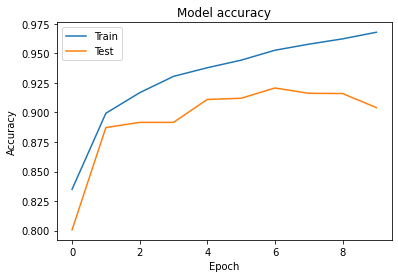

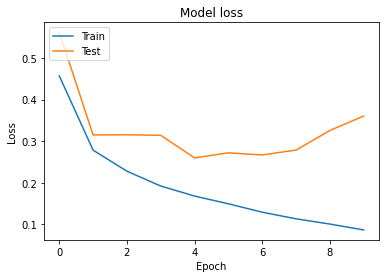

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 10% 

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4845 - accuracy: 0.8262 - val_loss: 0.5217 - val_accuracy: 0.8317
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.3017 - accuracy: 0.8902 - val_loss: 0.3099 - val_accuracy: 0.8882
Epoch 3/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2517 - accuracy: 0.9070 - val_loss: 0.3126 - val_accuracy: 0.8922
Epoch 4/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2234 - accuracy: 0.9185 - val_loss: 0.2485 - val_accuracy: 0.9087
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1983 - accuracy: 0.9273 - val_loss: 0.2608 - val_accuracy: 0.9128
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1786 - accuracy: 0.9338 - val_loss: 0.2491 - val_accuracy: 0.9169
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1664 - accuracy: 0.9391 - val_loss: 0.2375 - val_accuracy: 0.9241

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0831 - accuracy: 0.9699
The accuracy of the Training data set is  96.99333310127258
313/313 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9210
The accuracy of the Test data set is  92.10000038146973


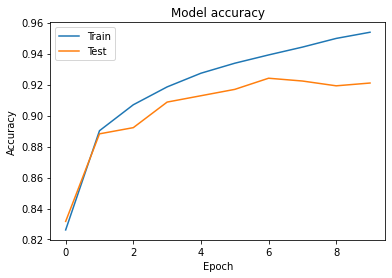

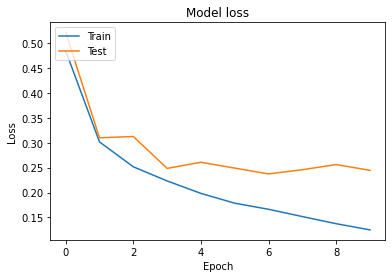

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 7%

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 10s 18ms/step - loss: 0.4557 - accuracy: 0.8359 - val_loss: 0.3541 - val_accuracy: 0.8725
Epoch 2/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2822 - accuracy: 0.8972 - val_loss: 0.3673 - val_accuracy: 0.8787
Epoch 3/10
469/469 [==============================] - 8s 18ms/step - loss: 0.2373 - accuracy: 0.9121 - val_loss: 0.3442 - val_accuracy: 0.8884
Epoch 4/10
469/469 [==============================] - 9s 18ms/step - loss: 0.2095 - accuracy: 0.9231 - val_loss: 0.2530 - val_accuracy: 0.9136
Epoch 5/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1838 - accuracy: 0.9320 - val_loss: 0.2524 - val_accuracy: 0.9128
Epoch 6/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1653 - accuracy: 0.9380 - val_loss: 0.2506 - val_accuracy: 0.9146
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1478 - accuracy: 0.9453 - val_loss: 0.2240 - val_accuracy: 0.926

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0703 - accuracy: 0.9746
The accuracy of the Training data set is  97.45833277702332
313/313 [==============================] - 1s 4ms/step - loss: 0.2728 - accuracy: 0.9228
The accuracy of the Test data set is  92.28000044822693


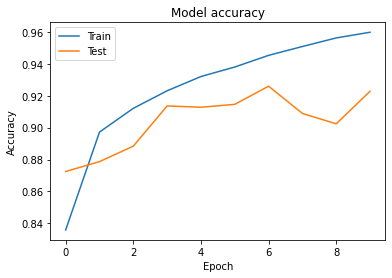

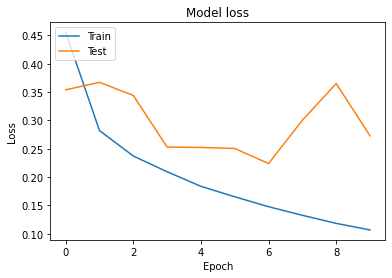

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

Dropout of 7% gave the best accuracy for this model

***Final CNN Model after optimization***
With Dropout - 0.07,
Activation Function - softmax,
optimizer - RMSprop

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 9s 17ms/step - loss: 0.4544 - accuracy: 0.8362 - val_loss: 0.3448 - val_accuracy: 0.8753
Epoch 2/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2854 - accuracy: 0.8956 - val_loss: 0.2928 - val_accuracy: 0.8974
Epoch 3/10
469/469 [==============================] - 8s 17ms/step - loss: 0.2391 - accuracy: 0.9130 - val_loss: 0.2730 - val_accuracy: 0.9052
Epoch 4/10
469/469 [==============================] - 8s 16ms/step - loss: 0.2059 - accuracy: 0.9235 - val_loss: 0.2305 - val_accuracy: 0.9185
Epoch 5/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1814 - accuracy: 0.9333 - val_loss: 0.2935 - val_accuracy: 0.8943
Epoch 6/10
469/469 [==============================] - 8s 17ms/step - loss: 0.1656 - accuracy: 0.9394 - val_loss: 0.2489 - val_accuracy: 0.9228
Epoch 7/10
469/469 [==============================] - 8s 16ms/step - loss: 0.1460 - accuracy: 0.9459 - val_loss: 0.2693 - val_accuracy: 0.9162

In [ ]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0745 - accuracy: 0.9721
The accuracy of the Training data set is  97.20666408538818
313/313 [==============================] - 1s 4ms/step - loss: 0.2573 - accuracy: 0.9262
The accuracy of the Test data set is  92.61999726295471


The imporved accuracy after optimizing the CNN model is 92.61 that is > than the accuracy of the base CNN model(92.01)

Data Augmentation

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
onehoty_train = encoder.fit_transform(y_train)

encoder1 = OneHotEncoder(drop='first', sparse=False)
onehoty_test = encoder1.fit_transform(y_test)


print(onehoty_train.shape, onehoty_test.shape)


(60000, 10) (10000, 10)


In [14]:
from keras_preprocessing.image import ImageDataGenerator

In [15]:
datagen = ImageDataGenerator(rotation_range = 90)

Visualization Graph 3

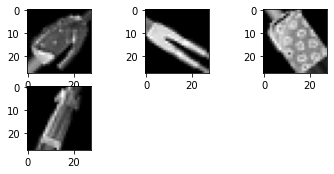

In [16]:
b = datagen.fit(x_train)
for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=4):
	for i in range(0, 4):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	plt.show()
 
	break

In [17]:
augmented_data = datagen.flow(x_train, onehoty_train, batch_size=60000)
x_train_new = np.copy(x_train)
y_train_new = np.copy(onehoty_train)
for i in range(3):
  augmented_images = augmented_data.next()
  x_train_new = np.concatenate((x_train_new, augmented_images[0]))
  y_train_new = np.concatenate((y_train_new, augmented_images[1]))

  

In [18]:
print(x_train_new.shape, y_train_new.shape) 

(240000, 28, 28, 1) (240000, 10)


In [19]:
datagen2 = ImageDataGenerator(rotation_range = 90)

In [20]:
augmented_data_test = datagen.flow(x_test, onehoty_test, batch_size=10000)
x_test_new = np.copy(x_test)
y_test_new = np.copy(onehoty_test)
for i in range(3):
  augmented_images1 = augmented_data_test.next()
  x_test_new = np.concatenate((x_test_new, augmented_images1[0]))
  y_test_new = np.concatenate((y_test_new, augmented_images1[1]))

In [21]:
print(x_test_new.shape, y_test_new.shape) 

(40000, 28, 28, 1) (40000, 10)


Increased the dataset by x4 using data augmentation techniques and checking the accuracy of the CNN model

In [37]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.07))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.07))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(10, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=20, batch_size=128)

Epoch 1/20
1875/1875 [==============================] - 31s 16ms/step - loss: 0.5590 - accuracy: 0.7984 - val_loss: 0.4023 - val_accuracy: 0.8551
Epoch 2/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.3596 - accuracy: 0.8701 - val_loss: 0.3742 - val_accuracy: 0.8618
Epoch 3/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.3068 - accuracy: 0.8896 - val_loss: 0.3417 - val_accuracy: 0.8795
Epoch 4/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2725 - accuracy: 0.9021 - val_loss: 0.2980 - val_accuracy: 0.8934
Epoch 5/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2495 - accuracy: 0.9096 - val_loss: 0.2874 - val_accuracy: 0.8984
Epoch 6/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2306 - accuracy: 0.9174 - val_loss: 0.2905 - val_accuracy: 0.8984
Epoch 7/20
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2132 - accuracy: 0.9236 - val_loss: 0.2913 -

In [38]:
_, acc = model.evaluate(x_train, y_train)
print('The accuracy of the Training data set is ',acc*100)
_, acc = model.evaluate(x_test, y_test)
print('The accuracy of the Test data set is ',acc*100)

1875/1875 [==============================] - 6s 3ms/step - loss: 0.0427 - accuracy: 0.9851
The accuracy of the Training data set is  98.51499795913696
313/313 [==============================] - 2s 5ms/step - loss: 0.2619 - accuracy: 0.9284
The accuracy of the Test data set is  92.83999800682068


We can see that the accuracy after augmenting the data by x4 is 92.839 which is > than the accuracy of the final CNN model (92.61)

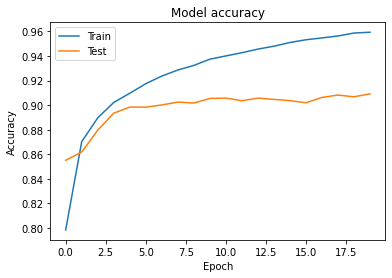

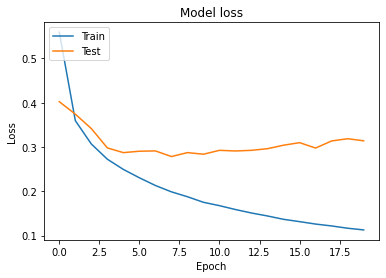

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()